Data is saved in the `data` folder by default. The data is saved according to the pattern described by this python code:
```Python
  def save_state(self):
    self.history[f"g{self.game_state.generation}"] = [player.model_dump() for player in self.players]
    os.makedirs(os.path.dirname(self.save_path), exist_ok=True)
    data = self.game_state.model_dump()
    data["history"] = self.history
    with open(self.save_path, "w") as f:
      json.dump(data, f)
```
Where `self.game_state.generation` is a string indicating the generation number, and `self.save_path` is a string indicating the path to the file where the data is saved.
Also `self.game_state` is the following class:
```Python
class DynamicGameState(BaseModel):
  generation: int
  round: int

class GameConfig(BaseModel):
  donation_multiplier: float = 2
  trace_depth: int = 3
  base_wallet: int = 10
  generations: int = 10
  rounds: int = 12
  players: int = 12
  cutoff_threshold: float = 0.5

class GameState(GameConfig, DynamicGameState):
  pass
```
Finally `player.model_dump()` is a function that serializes the player class in as follows:
```Python
  def model_dump(self):
    return {
      "name": self.name,
      "parents": [parent.name for parent in self.parents],
      "history": [decision.model_dump() for decision in self.history],
      "wallet": self.wallet,
      "strategy": self.strategy
    }
```
Where `self.name` is the player's name, `self.parents` is a list of the player's parents (who are also players), `self.history` is a list of the player's decisions, `self.wallet` is the player's wallet, and `self.strategy` is the player's strategy.
This is what a `Decision` class looks like:
```Python
class DynamicGameState(BaseModel):
  generation: int
  round: int
class Decision(BaseModel):
  # agents data
  recipient_name: str
  donor_name: str
  # game state data
  dynamic_game_state: DynamicGameState
  # donation data
  donation_percent: float
  donation_amount: float
  # donor wallet data
  donor_wallet_before: float
  donor_wallet_after: float
  
  class Config:
    arbitrary_types_allowed = True
```

In [2]:
import json
data_path = "data/g10_r12_p12/game_state.json"
output_dir = "data/g10_r12_p12/"
data = json.load(open(data_path, "r"))
# print data snippet
print(json.dumps(data, indent=4)[:1200] + "...")

{
    "generation": 9,
    "round": 13,
    "donation_multiplier": 2,
    "trace_depth": 3,
    "base_wallet": 10,
    "generations": 10,
    "rounds": 12,
    "players": 12,
    "cutoff_threshold": 0.5,
    "history": {
        "g0": [
            {
                "name": "0_0",
                "parents": [],
                "history": [
                    {
                        "recipient_name": "0_2",
                        "donor_name": "0_0",
                        "dynamic_game_state": {
                            "generation": 0,
                            "round": 0
                        },
                        "donation_percent": 0.1,
                        "donation_amount": 1.0,
                        "donor_wallet_before": 10.0,
                        "donor_wallet_after": 9.0
                    },
                    {
                        "recipient_name": "0_7",
                        "donor_name": "0_0",
                        "dynamic_game_state"

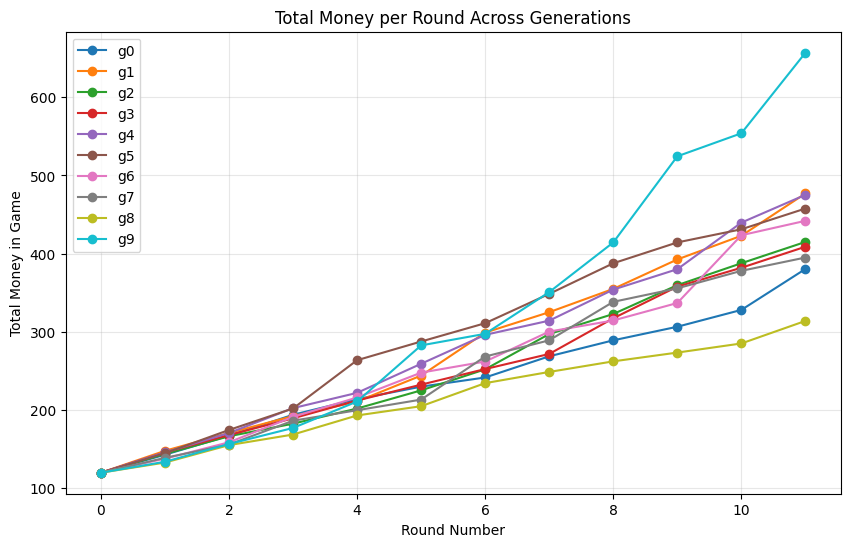

In [3]:
# build a graph line graph where the x-axis is the round number and the y-axis is the total amount of money in the game have this graph overlap for each generation and add a non obstructive legend
import matplotlib.pyplot as plt
import json

# Load the data
with open(data_path, "r") as f:
    data = json.load(f)

rounds = data["rounds"]
generations = data["generations"]

# Create figure and axis
plt.figure(figsize=(10, 6))

generation_totals = []

# Plot line for each generation
for i in range(generations):
    gen_players = data["history"][f"g{i}"]
    total_money_per_round = [0] * rounds
    for j in range(rounds):
        for player in gen_players:
            total_money_per_round[j] += player["history"][j]["donor_wallet_before"]
    generation_totals.append(total_money_per_round)
    
    # Plot this generation's line
    plt.plot(range(rounds), generation_totals[i], marker='o', label=f"g{i}")  # Remove 'g' from generation label

# Customize the plot
plt.xlabel('Round Number')
plt.ylabel('Total Money in Game')
plt.title('Total Money per Round Across Generations')
plt.grid(True, alpha=0.3)
plt.legend()

# save the plot in data directory
plt.savefig(output_dir+"total_money_per_round.png")

# Show the plot
plt.show()



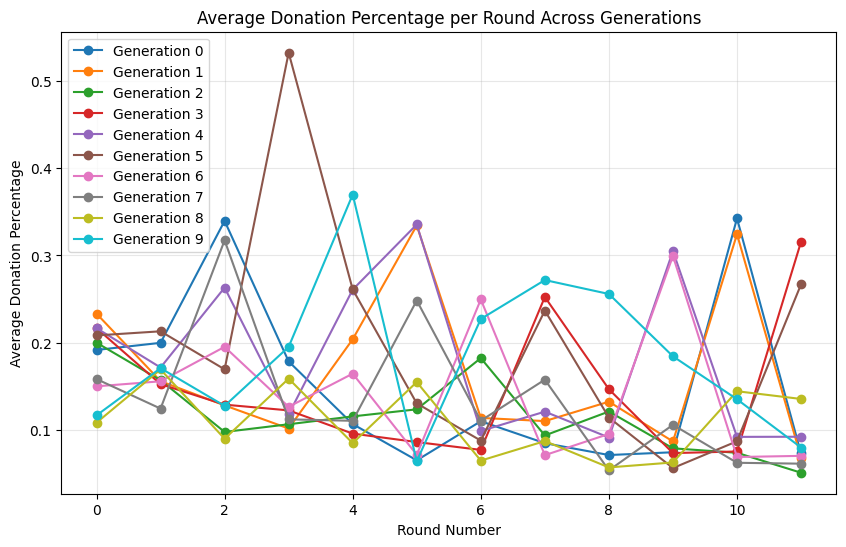

In [4]:
# Create a line graph showing average donation percentages per round across generations
import matplotlib.pyplot as plt
import json

# Load the data
with open(data_path, "r") as f:
    data = json.load(f)

rounds = data["rounds"]
generations = data["generations"]

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot line for each generation
for i in range(generations):
    gen_players = data["history"][f"g{i}"]
    avg_donation_per_round = [0] * rounds
    for j in range(rounds):
        round_donations = []
        for player in gen_players:
            round_donations.append(player["history"][j]["donation_percent"])
        avg_donation_per_round[j] = sum(round_donations) / len(round_donations)
    
    # Plot this generation's line
    plt.plot(range(rounds), avg_donation_per_round, marker='o', label=f"Generation {i}")

# Customize the plot
plt.xlabel('Round Number')
plt.ylabel('Average Donation Percentage')
plt.title('Average Donation Percentage per Round Across Generations')
plt.grid(True, alpha=0.3)
plt.legend()

plt.savefig(output_dir+"avg_donation_percentage.png")

# Show and save the plot
plt.show()

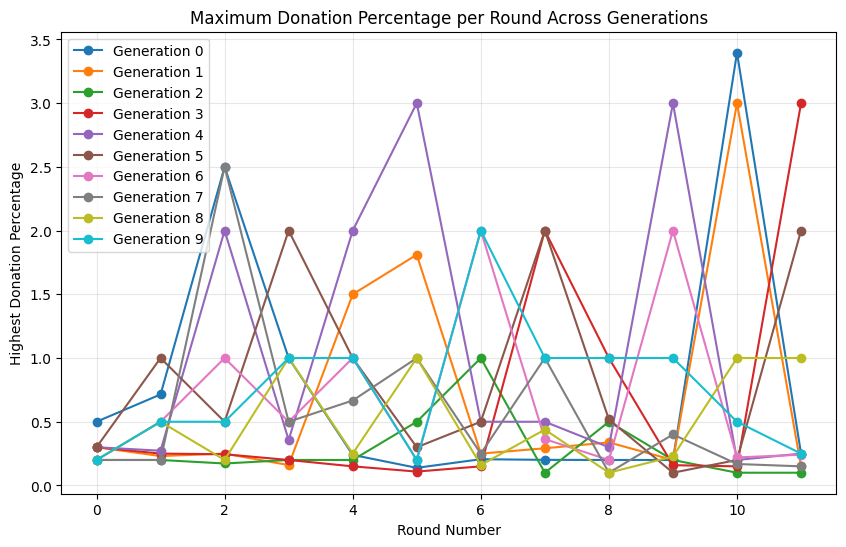

In [5]:
# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot line for each generation
for i in range(generations):
    gen_players = data["history"][f"g{i}"]
    max_donation_per_round = [0] * rounds
    for j in range(rounds):
        round_donations = []
        for player in gen_players:
            round_donations.append(player["history"][j]["donation_percent"])
        max_donation_per_round[j] = max(round_donations)
    
    # Plot this generation's line
    plt.plot(range(rounds), max_donation_per_round, marker='o', label=f"Generation {i}")

# Customize the plot
plt.xlabel('Round Number')
plt.ylabel('Highest Donation Percentage')
plt.title('Maximum Donation Percentage per Round Across Generations')
plt.grid(True, alpha=0.3)
plt.legend()

plt.savefig(output_dir+"max_donation_percentage.png")

# Show and save the plot
plt.show()

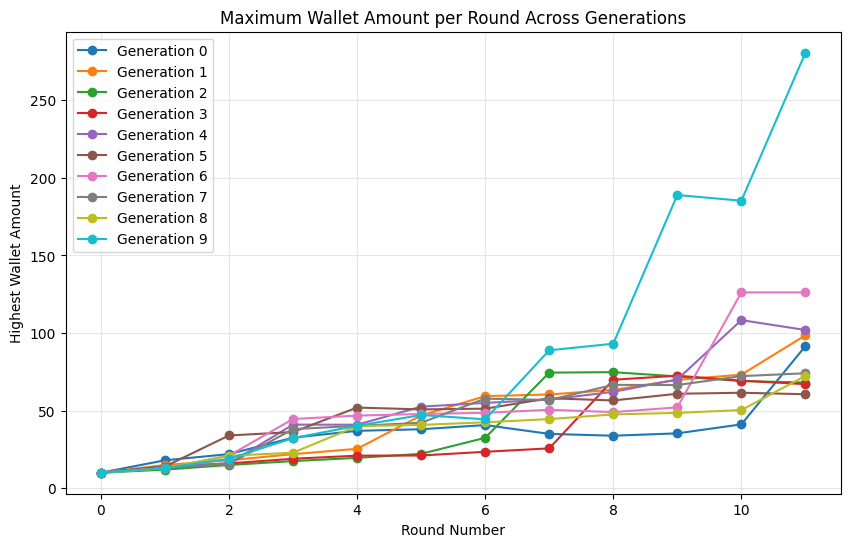

In [6]:
# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot line for each generation
for i in range(generations):
    gen_players = data["history"][f"g{i}"]
    max_wallet_per_round = [0] * rounds
    for j in range(rounds):
        round_wallets = []
        for player in gen_players:
            round_wallets.append(player["history"][j]["donor_wallet_before"])
        max_wallet_per_round[j] = max(round_wallets)
    
    # Plot this generation's line
    plt.plot(range(rounds), max_wallet_per_round, marker='o', label=f"Generation {i}")

# Customize the plot
plt.xlabel('Round Number')
plt.ylabel('Highest Wallet Amount')
plt.title('Maximum Wallet Amount per Round Across Generations')
plt.grid(True, alpha=0.3)
plt.legend()

plt.savefig(output_dir+"max_wallet_amount.png")

# Show and save the plot
plt.show()